## Static dataset creation
This notebook walks through how to use the modules to create and save a static dataset for use in all of the statistical and ML methods. The method-focused notebooks show how to import and utilize this static dataset in inference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.io import DataLoader, DataPreparation

Use the `DataPreparation()` class from `io` to simulate some linear data with two levels of noise.

Low noise is $\sigma = 1$. High noise is $\sigma = 10$. Both use the same input xs and same priors. Let's simulate the low noise first.

In [2]:
data = DataPreparation()

In [3]:
size_df = 1000
data.sample_params_from_prior(size_df)

In [4]:
sigma = 1
data.simulate_data(data.params,
                   sigma, 
                   'linear_homogeneous'
                    )

Linear simulation data generated.


Let's take a look at this simulated dataset.

In [5]:
print(np.shape(data.output[0]))
data.output

torch.Size([101])


tensor([[ 4.3750e+00,  1.3201e+01,  2.2403e+01,  ...,  8.7229e+02,
          8.8232e+02,  8.8982e+02],
        [ 4.1284e+00,  2.8761e+00,  4.8941e+00,  ...,  3.5861e+01,
          3.2522e+01,  3.5881e+01],
        [-8.1434e+00, -8.6568e+00, -5.0547e+00,  ...,  1.5475e+02,
          1.5666e+02,  1.5892e+02],
        ...,
        [-5.7827e+00, -4.7913e+00, -2.6025e+00,  ...,  5.0210e+01,
          4.9311e+01,  4.9728e+01],
        [-1.0196e+01, -5.5885e+00, -4.5810e+00,  ...,  1.7591e+02,
          1.7974e+02,  1.8307e+02],
        [-5.4985e+00, -6.8930e-01,  4.1053e+00,  ...,  4.8852e+02,
          4.9244e+02,  4.9835e+02]])

In [6]:
data.params

tensor([[ 8.8556,  5.0874],
        [ 0.3151,  3.3746],
        [ 1.6656, -8.0989],
        ...,
        [ 0.5427, -4.4477],
        [ 1.9035, -8.6857],
        [ 5.0306, -4.7992]])

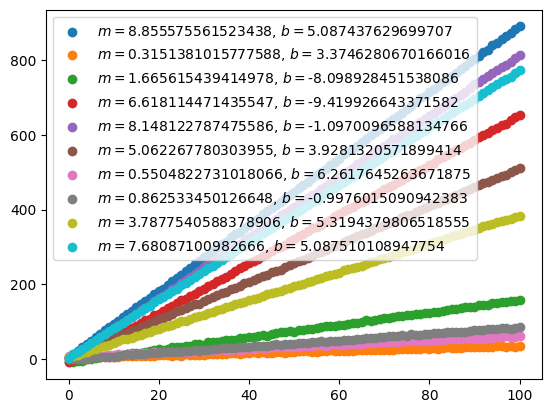

In [7]:
plt.clf()
for i in range(10):
    plt.scatter(data.input, data.output[i],
                label = f'$m = ${data.params[i][0].numpy()}, $b = ${data.params[i][1].numpy()}')
plt.legend()
plt.show()
    

In [8]:
# now make it into a dataframe
dict = data.get_dict()
dict

{'params': tensor([[ 8.8556,  5.0874],
         [ 0.3151,  3.3746],
         [ 1.6656, -8.0989],
         ...,
         [ 0.5427, -4.4477],
         [ 1.9035, -8.6857],
         [ 5.0306, -4.7992]]),
 'inputs': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100.]),
 'output': tensor([[ 4.3750e+00,  1.3201e+01,  2.2403e+01,  ...,  8.7229e+02,
           8.8232e+02,  

## Save the data to h5

In [9]:
saver = DataLoader()

In [10]:
# save the dataframe
filepath = '../data/'
saver.save_data_h5('linear_sigma_'+str(sigma)+'_size_'+str(size_df), dict)